<a href="https://colab.research.google.com/github/anan-r99/adding-up/blob/master/GA_TSP_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 遺伝的アルゴリズム（GA）による巡回セールスマン（TSP）問題

##準備

### パラメータ設定

In [0]:
num_cities = 4 # 都市数
indivisuals = 5 #GAの個体数
generation = 100 #世代数
p_mutation = 0.05 #突然変異の確率

###ライブラリのインポート

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 都市座標の設定（乱数）

In [0]:
def generate_rand_cities(num_cities):
    positions = np.zeros((num_cities, 2))
    for i in range(num_cities):
        positions[i, 0] = random.random()
        positions[i, 1] = random.random()
    return positions

### 初期個体の生成

In [0]:
def generate_init_genes(num_indivisual, num_cities):
    genes = np.zeros((num_indivisual, num_cities), dtype=np.int16)
    for i in range(num_indivisual):
        genes[i,] = random.sample(range(num_cities), k=num_cities)
    return genes

###経路長の計算

In [0]:
def sum_path(cities, gene):
    sum = 0.
    for i in range(len(cities)-1):
        sum += np.linalg.norm(cities[int(gene[i])]-cities[int(gene[i+1])])
    return sum

#### 一世代分の個体のそれぞれの経路長を求める

In [0]:
def genes_path(genes, cities):
    pathlength_vec = np.zeros(len(genes))
    for i in range(len(genes)):
        indices = genes[i]
        pathlength_vec[i] = sum_path(cities, indices)
    return pathlength_vec

#### ルーレット選択のための選択確率テーブル生成

In [0]:
def generate_roulette(fitness_vec):
    total = np.sum(fitness_vec)
    roulette = np.zeros(len(fitness_vec))
    for i in range(len(fitness_vec)):
        roulette[i] = fitness_vec[i]/total
    return roulette

#### ルーレット選択

In [0]:
def roulette_choice(fitness_vec):
    roulette = generate_roulette(fitness_vec)
    choiced = np.random.choice(len(roulette), 2, replace=True, p=roulette)
    return choiced

#### 部分交叉

In [0]:
def partial_crossover(parent1, parent2):
    num = len(parent1)
    cross_point = random.randrange(0, num-1)
    child1 = parent1
    child2 = parent2
    for i in range(num - cross_point):
        target_index = cross_point + i
        
        target_value1 = parent1[target_index]
        target_value2 = parent2[target_index]
        exchange_index1 = np.where(parent1 == target_value2)
        exchange_index2 = np.where(parent2 == target_value1)

        child1[target_index] = target_value2
        child2[target_index] = target_value1
        child1[exchange_index1] = target_value1
        child2[exchange_index2] = target_value2
    return child1, child2

#### 突然変異

In [0]:
def translocation_mutation(genes, num_mutation, p_value):
    mutated_genes = genes
    for i in range(num_mutation):
        mutation_flg = np.random.choice(2, 1, p = [1-p_value, p_value])
        if mutation_flg == 1:
            mutation_value = np.random.choice(genes[i], 2, replace=  False)
            mutation_position1 = np.where(genes[i] == mutation_value[0])
            mutation_position2 = np.where(genes[i] == mutation_value[1])
            mutated_genes[i][mutation_position1] = mutation_value[1]
            mutated_genes[i][mutation_position2] = mutation_value[0]
    return mutated_genes

#### 都市の配置とルートの可視化

In [0]:
def show_cities(cities):
    for i in range(len(cities)):
        plt.scatter(cities[i][0], cities[i][1])

In [0]:
def show_route(cities, genes):
    for i in range(len(genes)-1):
        if i == 0:
            plt.text(cities[int(genes[i])][0], cities[int(genes[i])][1], "start")
        else:
            plt.text(cities[int(genes[i])][0], cities[int(genes[i])][1], str(i))
        plt.plot([cities[int(genes[i])][0], cities[int(genes[i+1])][0]], 
                 [cities[int(genes[i])][1], cities[int(genes[i+1])][1]])
    plt.text(cities[int(genes[i+1])][0], cities[int(genes[i+1])][1], "goal")

## 実行部

### 初期化

array([[0.1, 0.1],
       [0.2, 0.2],
       [0.1, 0.2],
       [0.2, 0.1]])

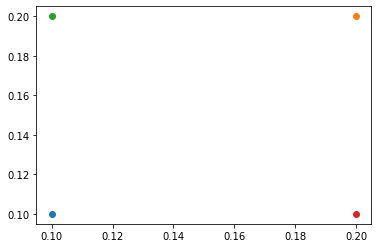

In [0]:
# cities = generate_rand_cities(num_cities)

cities = np.array([[0.1, 0.1], 
            [0.2, 0.2], 
            [0.1, 0.2], 
            [0.2, 0.1]])

genes = generate_init_genes(indivisuals, num_cities)
show_cities(cities)
cities

### GAの実行

generation: 0
route: [1. 3. 2. 0.]
sum_path: 0.3414213562373095


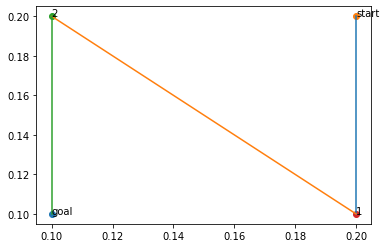

generation: 1
route: [2. 1. 3. 0.]
sum_path: 0.30000000000000004


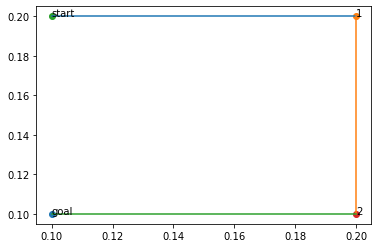

In [0]:
top_indivisual=[]
min_sum_path = 100
max_generation = 0;
elite = 9
for i in range(generation):
    fitness_vec = np.reciprocal(genes_path(genes, cities))
    child = np.zeros(np.shape(genes))
    for j in range(int((indivisuals-elite)/2)):
        parents_indices = roulette_choice(fitness_vec)
        child[2*j], child[2*j+1] = partial_crossover(genes[parents_indices[0]], 
                                                     genes[parents_indices[1]])
    
    for j in range(indivisuals-elite, indivisuals):
        child[j] = genes[np.argsort(fitness_vec)[j]]

    child = translocation_mutation(child, indivisuals-elite, p_mutation)
    top_indivisual.append(sum_path(cities, child[np.argmax(fitness_vec)]))
    genes = child
    
    if min_sum_path > sum_path(cities, child[np.argmax(fitness_vec)]):
        max_fit = max(fitness_vec)
        min_sum_path = sum_path(cities, child[np.argmax(fitness_vec)])
        max_generation = i;
        print("generation: "+str(i))
        print("route: "+str(child[np.argmax(fitness_vec)]))
        print("sum_path: "+str(sum_path(cities, child[np.argmax(fitness_vec)])))
        show_cities(cities)
        show_route(cities, child[np.argmax(fitness_vec)])
        plt.show()

### 巡回経路の距離の遷移

max generation: 1


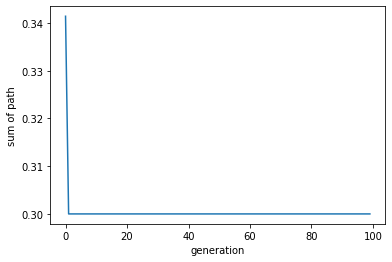

In [0]:
print("max generation: "+str(max_generation))
plt.plot(top_indivisual)
plt.xlabel("generation")
plt.ylabel("sum of path")
plt.show();